In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Regression

<h1>Question 1</h1>
Write a function, <i>coeffReport</i> that takes a linear model as its argument, and prints a "coefficient report", as we did in the previous lab. That is, print the feature names and coefficients with the 3 highest values, the 3 lowest values, and the 3 values closest to zero. Below is the beginning of the function definition -- you should complete this.


In [2]:
def coeffReport(linearModel, featureNames):

    coefs=linearModel.coef_



In [13]:
def coeffReport(linearModel, featureNames):

    coefs=linearModel.coef_

    sorted_coefs = sorted ((zip(featureNames, coefs)),
                key = lambda e:e[1], reverse=True )
    print("Highest Coefficients (Price)")

    for c in sorted_coefs[:3]:
        print(c)

    print("\nLowest Coefficients (Price)")

    for c in sorted_coefs[-3:]:
        print(c)
    
    coefsAbs = list(map(abs,coefs))
    sorted_coefs = sorted ((zip(featureNames, coefsAbs)),
                key = lambda e:e[1], reverse=True )

    print("\nCoefficients Closest to Zero (Price)")

    for c in sorted_coefs[-3:]:
        print(c)



In [14]:
from sklearn.datasets import fetch_california_housing

## the code below about ssl is because of a possible error in data access
## if you get the error you should uncomment it
#import ssl

#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
#else:
#    ssl._create_default_https_context = _create_unverified_https_context


housing = fetch_california_housing()


<h1>Question 2</h1>
Construct a LinearRegression model for the housing data. Report on the train and test score. Use the <i>coeffReport</i> function to report on the feature coefficients.

In [15]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))


coeffReport(linreg, housing.feature_names)

0.6109633715458154
0.5911695436410479
Highest Coefficients (Price)
('AveBedrms', 0.6167301519276989)
('MedInc', 0.4390910418774263)
('HouseAge', 0.00959864664834683)

Lowest Coefficients (Price)
('AveRooms', -0.10331117273737192)
('Latitude', -0.41735328390925364)
('Longitude', -0.4306144620886009)

Coefficients Closest to Zero (Price)
('HouseAge', 0.00959864664834683)
('AveOccup', 0.004488382564162358)
('Population', 7.632751973610588e-06)


<h1>Question 3</h1>
Construct a Ridge model for this data. Report on the train and test score, and use the <i>coeffReport</i> function to report on the feature coefficients.

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Train", ridge.score(X_train, y_train))
print("Test ", ridge.score(X_test, y_test), "\n")

coeffReport(linreg, housing.feature_names)


Train 0.610963329310342
Test  0.5911615930747931 

Highest Coefficients (Price)
('AveBedrms', 0.6167301519276989)
('MedInc', 0.4390910418774263)
('HouseAge', 0.00959864664834683)

Lowest Coefficients (Price)
('AveRooms', -0.10331117273737192)
('Latitude', -0.41735328390925364)
('Longitude', -0.4306144620886009)

Coefficients Closest to Zero (Price)
('HouseAge', 0.00959864664834683)
('AveOccup', 0.004488382564162358)
('Population', 7.632751973610588e-06)


<h1>Question 4</h1>
Create a loop to test many different values for the <i>alpha</i> parameter for the Ridge model. Create a list of results, with the test score, train score, and alpha value. Print the list, sorted by test score.


In [17]:
resList = []
for alpha in [0.001,0.01, 0.1, 0.3, 1, 100, 200, 300, 1000, 3000]:
    clf = Ridge(alpha=alpha, random_state=0).fit(X_train, y_train)

    res = (clf.score(X_test, y_test), clf.score(X_train, y_train), alpha)
    resList.append(res)
   
resListSrt = sorted (resList,
                key = lambda e:e[0], reverse=True)

print("     Test    ", "Train  ", "Alpha    ")
for r in resListSrt:
    print("{:9.4f} {:9.4f} {:7.2f}".format (r[0],r[1],r[2]))


     Test     Train   Alpha    
   0.5912    0.6110    0.00
   0.5912    0.6110    0.01
   0.5912    0.6110    0.10
   0.5912    0.6110    0.30
   0.5912    0.6110    1.00
   0.5902    0.6107  100.00
   0.5891    0.6100  200.00
   0.5881    0.6093  300.00
   0.5814    0.6039 1000.00
   0.5663    0.5897 3000.00


<h1>Question 5</h1>
Create a DecisionTreeRegressor model and fit it to this data. Print the score on train and test data.


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))




1.0
0.5762419686145415


<h1>Question 6</h1>
Create a RandomForestRegressor model and fit it to this data. Print the score on train and test data.


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))





0.9727159677969947
0.7941678302821006


# Classification

## Question 7
Read the file, telco.csv, and assign all the columns to X, except the column 'Churn', which you assign to y. Then perform a train-test split, setting the parameter: stratify=y.

In [28]:
import pandas as pd
df = pd.read_csv("telco.csv")
X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)



## Question 8
Produce a Logistic Regression  Classifier for the telco data. Report training and test results.

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train,y_train)
score_train = logreg.score(X_train,y_train)
score_test = logreg.score(X_test,y_test)


print("accuracy train {:.3f}  test {:.3f}".format(score_train, score_test))






accuracy train 0.801  test 0.804


## Question 8
Produce a Decision Tree Classifier for the telco data. Report training and test results.

In [31]:

from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
score_train = dtree.score(X_train,y_train)
score_test = dtree.score(X_test,y_test)


print("accuracy train {:.3f}  test {:.3f}".format(score_train, score_test))





accuracy train 1.000  test 0.716


Now construct a decision tree with max_depth of 2, and fit the tree to the training data. Then use the code below to display the tree (note that the model below is called "dtree").


In [48]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=2)

dtree.fit(X_train,y_train)
score_train = dtree.score(X_train,y_train)
score_test = dtree.score(X_test,y_test)


print("accuracy train {:.3f}  test {:.3f}".format(score_train, score_test))






accuracy train 0.792  test 0.785


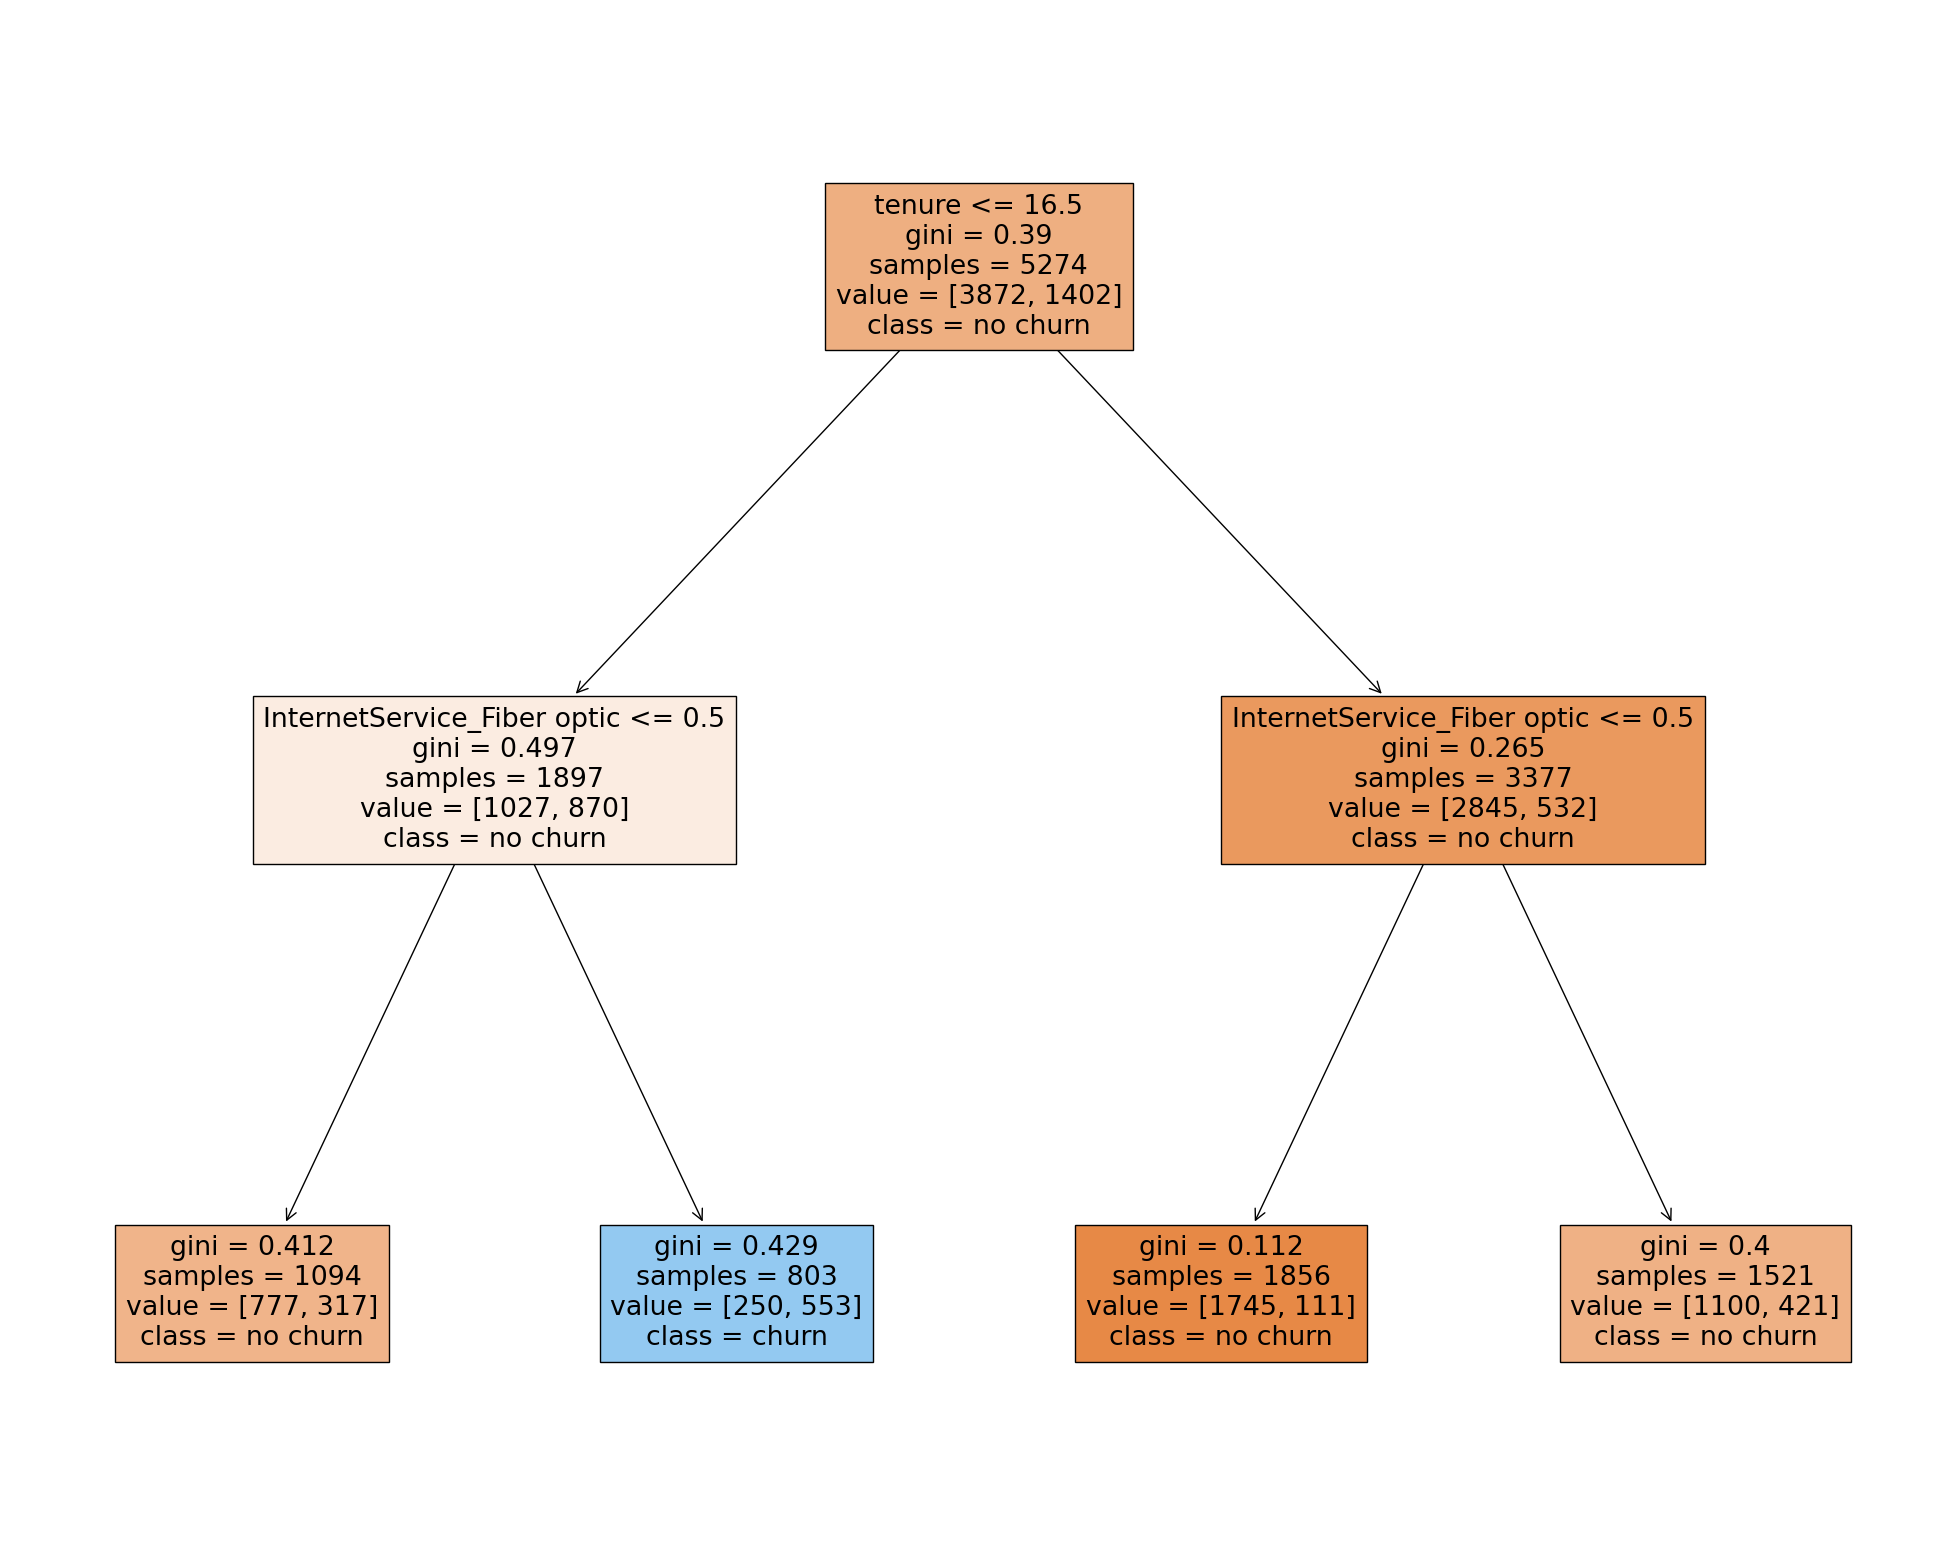

In [49]:
# Use this code to display tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                  class_names=["no churn","churn"], feature_names = X.columns, 
                   filled=True)

<h2>Question 10</h2>
Construct a random forest classifier for this data. Report train and test accuracy.

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
score_train = rf.score(X_train,y_train)
score_test = rf.score(X_test,y_test)


print("accuracy train {:.3f}  test {:.3f}".format(score_train, score_test))







accuracy train 1.000  test 0.786
